# Sales Analysis

In [45]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Merge all csv into one dataframe
files = [file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
all_data['Product'].nunique()

20

<Axes: >

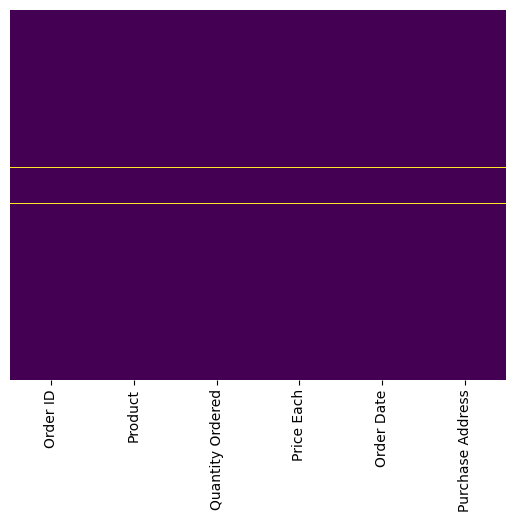

In [7]:
#Checking how many nulls are there in dataframe
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
all_data.dropna(inplace=True)

<Axes: >

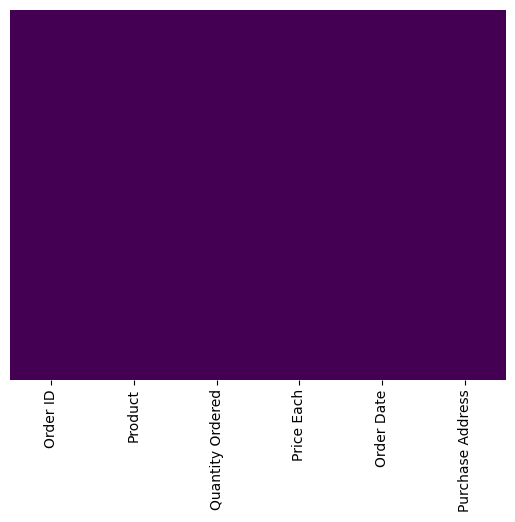

In [9]:
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


#
#
# Q: What was the best month for sales? How much was earned that month?

In [12]:
#Picking up first 2 elements of Order Date which are the months
all_data['Month'] = all_data['Order Date'].str[0:2]

In [1]:
#Converting into int
# all_data['Month'].astype('int')
#Gives an error: ValueError: invalid literal for int() with base 10: 'Or'

In [17]:
#Checking months which have value 'Or'
all_data[all_data['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [18]:
#Removing 'Or' columns
all_data = all_data[all_data['Month'] != 'Or']

In [22]:
#Conversion of data to int from string
all_data['Month'] = all_data['Month'].astype('int')

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\75538558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int')


In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [28]:
#Add the Price Each for all the months grouped
by_months = all_data.groupby('Month').sum()

In [30]:
#Doesn't work as intended since PriceEach is string
by_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Month,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,1121411111111111111111111111311112112111111111...,14.9570014.9560011.9915011.9511.9599.9914.9510...,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne..."
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,1111211111111111111211111112411121111211111111...,7003.84389.9914.953.8414.953.8415011.9511.9599...,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S..."
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,1111111111111111211211111151211111111131111111...,2.992.9911.9999.99999.9911.9999.99999.9911.953...,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada..."
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,2111111111111111111111111112111211111112131121...,11.9599.9960011.9911.9911.9599.9911.95170011.9...,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B..."
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,1111111111211111111111111111111121111111111111...,150149.9970015060011.9515099.9915099.993.84150...,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,..."


In [31]:
#Converting to float
all_data['Price Each'] = all_data['Price Each'].astype('float')

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\2508814514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype('float')


In [33]:
by_months = all_data.groupby('Month').sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\115222803.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_months = all_data.groupby('Month').sum()


In [34]:
by_months

,Price Each
Month,
1,1811768.38
2,2188884.72
3,2791207.83
4,3367671.02
5,3135125.13
6,2562025.61
7,2632539.56
8,2230345.42
9,2084992.09


In [42]:
by_months.max()

Price Each    4588415.41
dtype: float64

In [43]:
month = by_months.idxmax()
month

Price Each    12
dtype: int64

## December had the max sales

In [47]:
by_months_reset = by_months.reset_index()
by_months_reset

,Month,Price Each
0,1,1811768.38
1,2,2188884.72
2,3,2791207.83
3,4,3367671.02
4,5,3135125.13
5,6,2562025.61
6,7,2632539.56
7,8,2230345.42
8,9,2084992.09
9,10,3715554.83


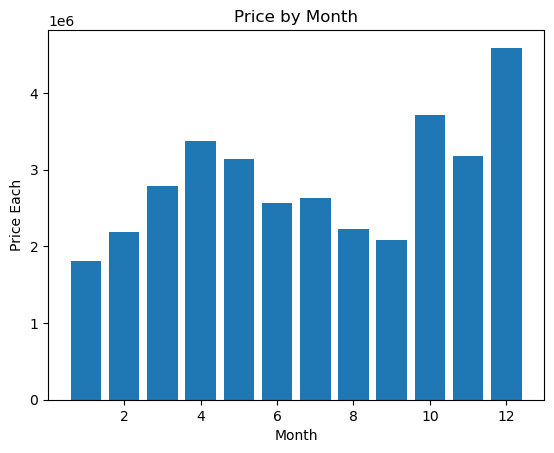

In [50]:
#Plot to visualize data
plt.bar(by_months_reset['Month'], by_months_reset['Price Each'])
plt.xlabel('Month')
plt.ylabel('Price Each')
plt.title('Price by Month')
plt.show()

#
#
# Q: What city had the highest number of sales?

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [59]:
#Splitting address by ',' and picking up second last element which is the city
all_data['Purchase Address'].str.split(',').str[-2]

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
11681       Los Angeles
11682     San Francisco
11683     San Francisco
11684     San Francisco
11685     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [60]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[-2]

In [61]:
all_data['City'].nunique()

9

In [62]:
#Group cities and sum their prices
all_data.groupby('City').sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\1825725989.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('City').sum()


,Price Each,Month
City,,
Atlanta,2779908.20,104794
Austin,1809873.61,69829
Boston,3637409.77,141112
Dallas,2752627.82,104620
Los Angeles,5421435.23,208325
New York City,4635370.83,175741
Portland,2307747.47,87765
San Francisco,8211461.74,315520
Seattle,2733296.01,104941


In [63]:
sales_city = all_data.groupby('City').sum().drop('Month', axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\3020938765.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_city = all_data.groupby('City').sum().drop('Month', axis=1)


In [64]:
sales_city

,Price Each
City,
Atlanta,2779908.20
Austin,1809873.61
Boston,3637409.77
Dallas,2752627.82
Los Angeles,5421435.23
New York City,4635370.83
Portland,2307747.47
San Francisco,8211461.74
Seattle,2733296.01


In [65]:
sales_city.idxmax()

Price Each     San Francisco
dtype: object

## San Francisco had the max sales

In [67]:
sales_city = sales_city.reset_index()


In [69]:
sales_city

,City,Price Each
0,Atlanta,2779908.20
1,Austin,1809873.61
2,Boston,3637409.77
3,Dallas,2752627.82
4,Los Angeles,5421435.23
5,New York City,4635370.83
6,Portland,2307747.47
7,San Francisco,8211461.74
8,Seattle,2733296.01


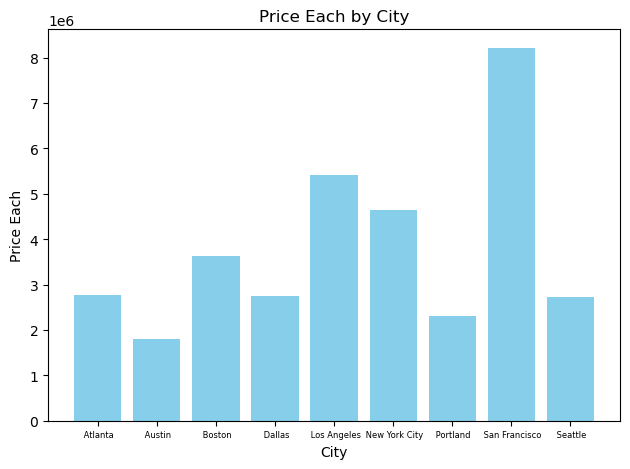

In [74]:
#Plot to visualize better
plt.bar(sales_city['City'], sales_city['Price Each'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Price Each')  
plt.title('Price Each by City')  
plt.xticks(fontsize=6) 
plt.tight_layout()

#
#
# Q: What time should we display advertisements to maximize likelihood of customers buying product?

In [75]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [82]:
#Date and time are separated by whitespace. Second one is the time, so we select that.
#Hour and minutes are separated by ':', so we split by ':' and select the first element, which is hrs.
all_data['Order Date'].str.split().str[-1].str.split(':').str[0]

0        08
2        22
3        14
4        14
5        09
         ..
11681    20
11682    16
11683    07
11684    17
11685    00
Name: Order Date, Length: 185950, dtype: object

In [84]:
by_hour = pd.DataFrame()
by_hour['Hour'] = all_data['Order Date'].str.split().str[-1].str.split(':').str[0]

In [86]:
by_hour['Sales'] = all_data['Price Each']

In [87]:
by_hour.head()

,Hour,Sales
0,08,11.95
2,22,99.99
3,14,600.00
4,14,11.99
5,09,11.99


In [90]:
#Sum up the sales for each 'Hour' grouped
hr = by_hour.groupby('Hour').sum()

In [91]:
hr.head()

,Sales
Hour,
00,709296.70
01,458490.00
02,233833.64
03,144726.42
04,162058.18


In [94]:
hr.reset_index(inplace=True)
hr.head()

,Hour,Sales
0,00,709296.70
1,01,458490.00
2,02,233833.64
3,03,144726.42
4,04,162058.18


In [95]:
#Checking if it has 24 enteries (for 24 hrs)
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    24 non-null     object 
 1   Sales   24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 516.0+ bytes


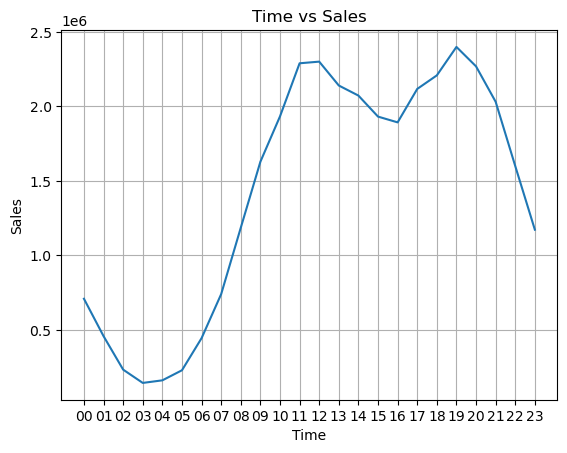

In [100]:
#Plotting to visualize
plt.plot(hr['Hour'], hr['Sales'])
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Time vs Sales')
plt.grid()

In [99]:
hr['Sales'].idxmax()

19

## They should either advertize around 7pm or 12pm

#
#
# Q: What products are most often sold together?

In [101]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [152]:
id_prod = pd.DataFrame()

In [153]:
#New dataframe with relevent columns only
id_prod['id'] = all_data['Order ID']
id_prod['prod'] = all_data['Product']
id_prod['sales'] = all_data['Price Each']
id_prod.head()

,id,prod,sales
0,176558,USB-C Charging Cable,11.95
2,176559,Bose SoundSport Headphones,99.99
3,176560,Google Phone,600.00
4,176560,Wired Headphones,11.99
5,176561,Wired Headphones,11.99


In [154]:
#Order IDs is unique for one order, which is how we can figure out the grouping of items.

#Group by IDs and convert the products into lists and add the sales
def modify(group):
    return [list(group['prod']), group['sales'].sum()]
            
id_prod = id_prod.groupby('id').apply(modify)

In [155]:
id_prod.head()

id
141234                      [[iPhone], 700.0]
141235    [[Lightning Charging Cable], 14.95]
141236            [[Wired Headphones], 11.99]
141237           [[27in FHD Monitor], 149.99]
141238            [[Wired Headphones], 11.99]
dtype: object

In [156]:
id_prod = id_prod.reset_index()

In [157]:
id_prod.head()

,id,0
0,141234,"[[iPhone], 700.0]"
1,141235,"[[Lightning Charging Cable], 14.95]"
2,141236,"[[Wired Headphones], 11.99]"
3,141237,"[[27in FHD Monitor], 149.99]"
4,141238,"[[Wired Headphones], 11.99]"


In [161]:
#Separate the product's list and sales since they are grouped together
id_prod['Comb'] = id_prod[0].apply(lambda x: x[0])

In [163]:
id_prod['Sale'] = id_prod[0].apply(lambda x: x[1])

In [164]:
id_prod.head()

,id,0,Comb,Sale
0,141234,"[[iPhone], 700.0]",[iPhone],700.00
1,141235,"[[Lightning Charging Cable], 14.95]",[Lightning Charging Cable],14.95
2,141236,"[[Wired Headphones], 11.99]",[Wired Headphones],11.99
3,141237,"[[27in FHD Monitor], 149.99]",[27in FHD Monitor],149.99
4,141238,"[[Wired Headphones], 11.99]",[Wired Headphones],11.99


In [170]:
#Checking if all of the rows are unique
id_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178436 entries, 1 to 178436
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      178436 non-null  object 
 1   0       178436 non-null  object 
 2   Comb    178436 non-null  object 
 3   Sale    178436 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [172]:
id_prod['id'].nunique()

178436

In [198]:
#A dataframe with only the orders which have more than 2 stuff ordered at same time.
id_prod_combs = id_prod[id_prod['Comb'].apply(len) >= 2]

In [199]:
id_prod_combs.head()

,id,0,Comb,Sale
41,141275,"[[USB-C Charging Cable, Wired Headphones], 23....","[USB-C Charging Cable, Wired Headphones]",23.94
56,141290,"[[Apple Airpods Headphones, AA Batteries (4-pa...","[Apple Airpods Headphones, AA Batteries (4-pack)]",153.84
131,141365,"[[Vareebadd Phone, Wired Headphones], 411.99]","[Vareebadd Phone, Wired Headphones]",411.99
150,141384,"[[Google Phone, USB-C Charging Cable], 611.95]","[Google Phone, USB-C Charging Cable]",611.95
216,141450,"[[Google Phone, Bose SoundSport Headphones], 6...","[Google Phone, Bose SoundSport Headphones]",699.99


In [200]:
#Sort the 'Comb' row
id_prod_combs['Comb'] = id_prod_combs['Comb'].apply(sorted)

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\3781983917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_prod_combs['Comb'] = id_prod_combs['Comb'].apply(sorted)


In [201]:
id_prod_combs.head()

,id,0,Comb,Sale
41,141275,"[[USB-C Charging Cable, Wired Headphones], 23....","[USB-C Charging Cable, Wired Headphones]",23.94
56,141290,"[[Apple Airpods Headphones, AA Batteries (4-pa...","[AA Batteries (4-pack), Apple Airpods Headphones]",153.84
131,141365,"[[Vareebadd Phone, Wired Headphones], 411.99]","[Vareebadd Phone, Wired Headphones]",411.99
150,141384,"[[Google Phone, USB-C Charging Cable], 611.95]","[Google Phone, USB-C Charging Cable]",611.95
216,141450,"[[Google Phone, Bose SoundSport Headphones], 6...","[Bose SoundSport Headphones, Google Phone]",699.99


In [2]:
#Group by 'Comb' and sum their Sales
#id_prod_combs.groupby('Comb').sum()
#Gives an error: TypeError: unhashable type: 'list'

In [204]:
#So, converting list into string for grouping purposes
id_prod_combs['liststring'] = [','.join(map(str, l)) for l in id_prod_combs['Comb']]

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\1566909040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_prod_combs['liststring'] = [','.join(map(str, l)) for l in id_prod_combs['Comb']]


In [208]:
id_prod_combs

,id,0,Comb,Sale,liststring
41,141275,"[[USB-C Charging Cable, Wired Headphones], 23....","[USB-C Charging Cable, Wired Headphones]",23.94,"USB-C Charging Cable,Wired Headphones"
56,141290,"[[Apple Airpods Headphones, AA Batteries (4-pa...","[AA Batteries (4-pack), Apple Airpods Headphones]",153.84,"AA Batteries (4-pack),Apple Airpods Headphones"
131,141365,"[[Vareebadd Phone, Wired Headphones], 411.99]","[Vareebadd Phone, Wired Headphones]",411.99,"Vareebadd Phone,Wired Headphones"
150,141384,"[[Google Phone, USB-C Charging Cable], 611.95]","[Google Phone, USB-C Charging Cable]",611.95,"Google Phone,USB-C Charging Cable"
216,141450,"[[Google Phone, Bose SoundSport Headphones], 6...","[Bose SoundSport Headphones, Google Phone]",699.99,"Bose SoundSport Headphones,Google Phone"
...,...,...,...,...,...
178302,319536,"[[Macbook Pro Laptop, Wired Headphones], 1711.99]","[Macbook Pro Laptop, Wired Headphones]",1711.99,"Macbook Pro Laptop,Wired Headphones"
178322,319556,"[[Google Phone, Wired Headphones], 611.99]","[Google Phone, Wired Headphones]",611.99,"Google Phone,Wired Headphones"
178350,319584,"[[iPhone, Wired Headphones], 711.99]","[Wired Headphones, iPhone]",711.99,"Wired Headphones,iPhone"
178362,319596,"[[iPhone, Lightning Charging Cable], 714.95]","[Lightning Charging Cable, iPhone]",714.95,"Lightning Charging Cable,iPhone"


In [209]:
id_prod_combs['liststring'].nunique()

227

In [214]:
#Group by 'Comb' and sum the sales
sales_comb = id_prod_combs.groupby('liststring').sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_48280\192877352.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_comb = id_prod_combs.groupby('liststring').sum()


In [217]:
sales_comb.head()

,Sale
liststring,
"20in Monitor,20in Monitor",659.94
"20in Monitor,27in 4K Gaming Monitor",999.96
"20in Monitor,27in FHD Monitor",1299.90
"20in Monitor,34in Ultrawide Monitor",979.96
"20in Monitor,AA Batteries (4-pack)",1821.28


In [216]:
sales_comb['Sale'].idxmax()

'Lightning Charging Cable,iPhone'

## Most grouped item is: Lightning Charging Cable & iPhone

In [218]:
sales_comb.reset_index(inplace=True)

In [226]:
#Get top 5 sales
top5_sales = sales_comb.nlargest(5, 'Sale')

In [227]:
top5_sales

,liststring,Sale
203,"Lightning Charging Cable,iPhone",637020.45
173,"Google Phone,USB-C Charging Cable",531172.60
225,"Wired Headphones,iPhone",266284.26
133,"Apple Airpods Headphones,iPhone",254150.00
181,"Google Phone,Wired Headphones",190328.89


Text(0.5, 1.0, 'Top 5 Sales')

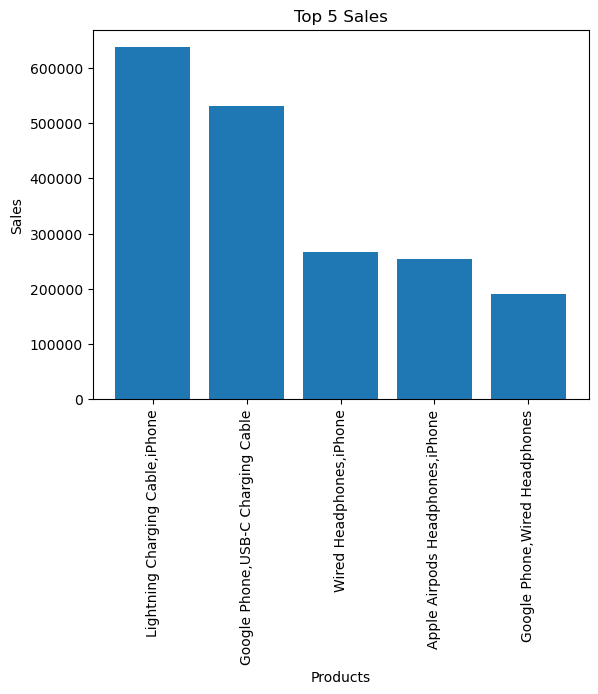

In [230]:
#Plot top 5 sales
plt.bar(top5_sales['liststring'], top5_sales['Sale'])
plt.xticks(rotation=90)
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Top 5 Sales')